In [1]:
import pandas_datareader as pdr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pdr.get_data_yahoo('ASIANPAINT.NS',start='2016-01-01',end='2020-12-31')

In [3]:
test_data=pdr.get_data_yahoo('ASIANPAINT.NS',start='2021-01-01',end='2021-12-31')

In [4]:
train=list(df[:]['Close'])
test=list(test_data[:]['Close'])

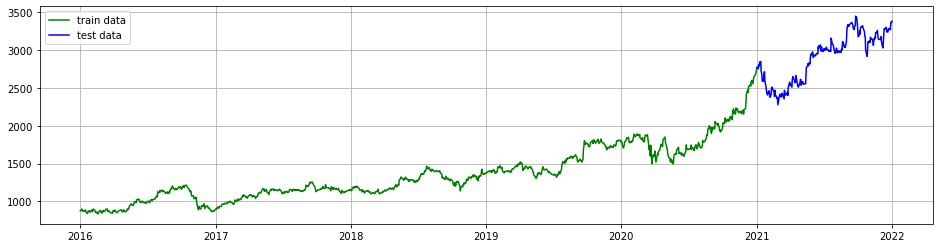

In [5]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(df[:]['Close'],'green',label='train data')
plt.plot(test_data[:]['Close'],'blue',label='test data')
plt.legend()

p,d,q calculation

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
result=adfuller(df.Close.dropna())
print("AdY statistics",result[0])
print("p-value",result[1])

AdY statistics 2.0124208566096753
p-value 0.9986888749889395


d=no of differences,
p=pacf,
q=acf

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

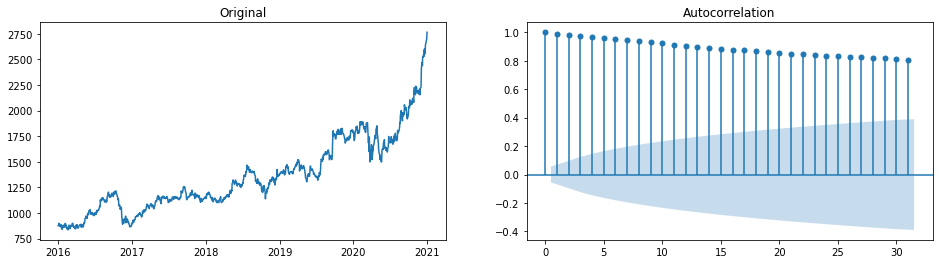

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

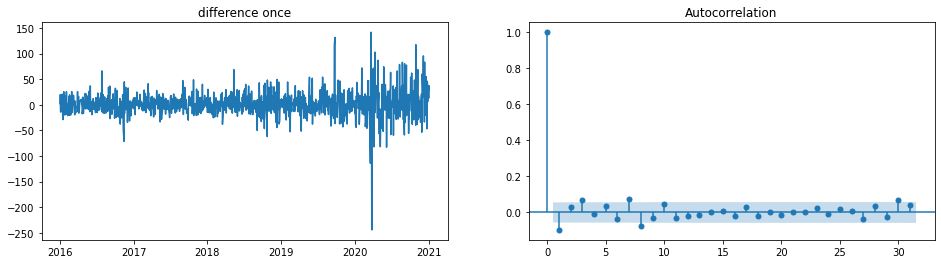

In [10]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
plot_acf(diff,ax=ax2);

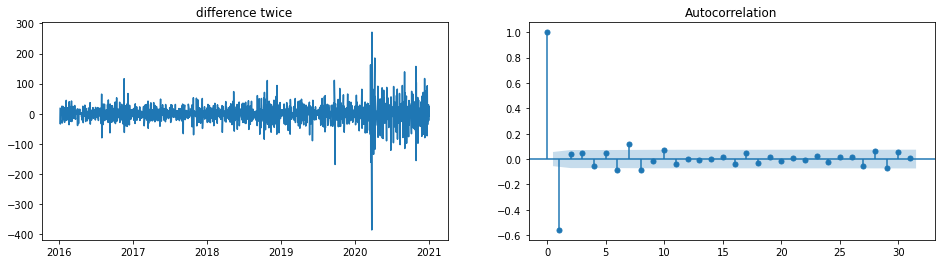

In [11]:
diff=df.Close.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference twice")
plot_acf(diff,ax=ax2);

inbuild library to find d value

In [12]:
from pmdarima.arima.utils import ndiffs

In [13]:
d=df.copy()
ndiffs(d.Close,test="adf")

1

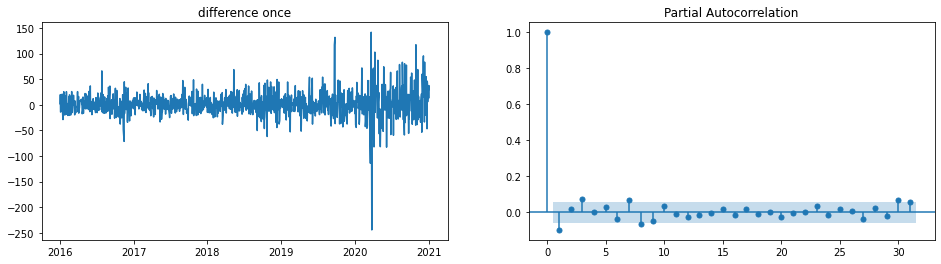

In [14]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_pacf(diff,ax=ax2);

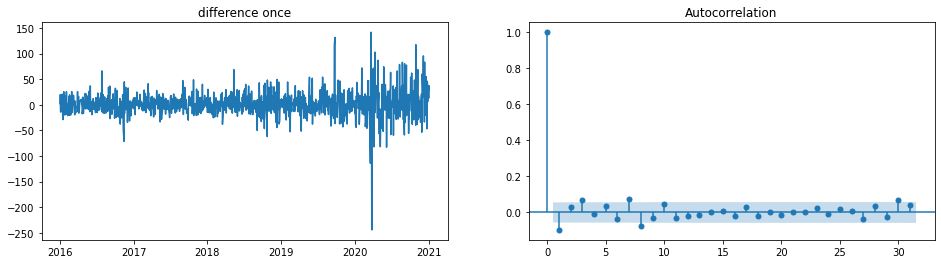

In [15]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_acf(diff,ax=ax2);

In [16]:
model_prediction=[]
n_test_obser=len(test)

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
for i in range(n_test_obser-20):
    model=ARIMA(train,order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output[0])[0]
    model_prediction.append(yhat)
    actual_test_value=test[i]
    train.append(actual_test_value)
    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
length=len(test)

In [21]:
fore=[]
for i in range(20):
    model=ARIMA(train,order=(4,1,0))
    model_fit=model.fit()
    y=model_fit.forecast()
    train.append(test[length-20+i])
    fore.append(list(y[0])[0])
    

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1480
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -7089.780
Method:                       css-mle   S.D. of innovations             29.121
Date:                Sun, 20 Mar 2022   AIC                          14191.560
Time:                        18:50:29   BIC                          14223.359
Sample:                             1   HQIC                         14203.414
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6785      0.717      2.341      0.019       0.273       3.084
ar.L1.D.y     -0.0360      0.026     -1.388      0.165      -0.087       0.015
ar.L2.D.y      0.0387      0.026      1.491      0.136      -0.012       0.090
ar.L3.D.y      0.0019      0.026      0.073      0.942      -0.049       0.053
ar.L4.D.y     -0.0602      0.026     -2.316      0.021      -0.111      -0.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4749           -1.3335j            1.9884           -0.3830
AR.2           -1.4749           +1.3335j            1.9884            0.3830
AR.3            1.4907           -1.4058j            2.0490           -0.1203
AR.4            1.4907           +1.4058j            2.0490            0.1203
-----------------------------------------------------------------------------
"""

In [23]:
len(test)

248

graph between actual predicted and forecasted


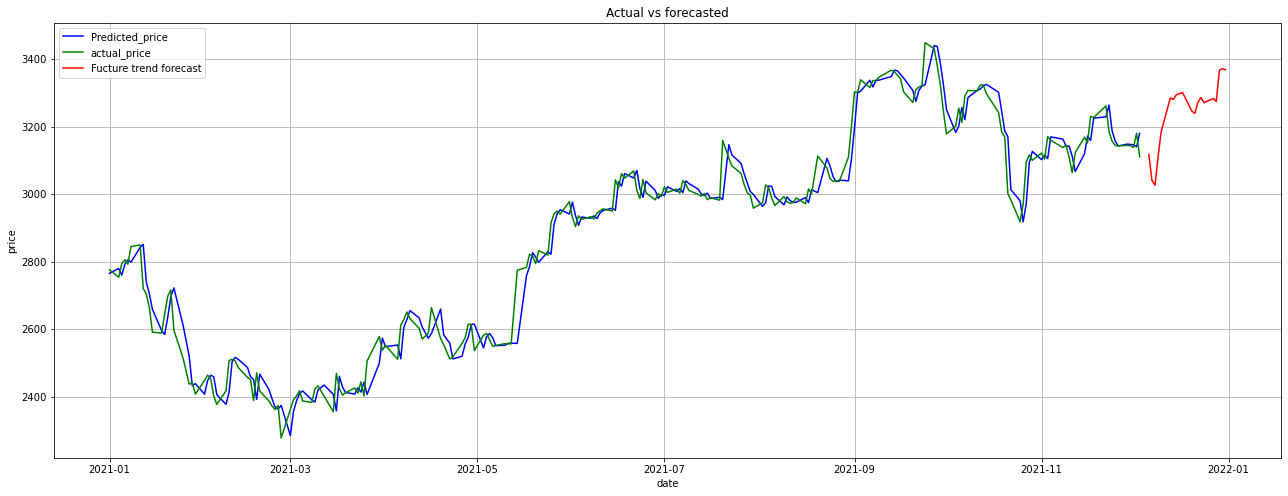

In [24]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[:-20],model_prediction[:],color='blue',label='Predicted_price')
plt.plot(data_range[:-20],test[:-20],color='green',label='actual_price')
plt.plot(data_range[-20:],fore[:],color='red',label='Fucture trend forecast')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


actual vs forecasted for 20 days

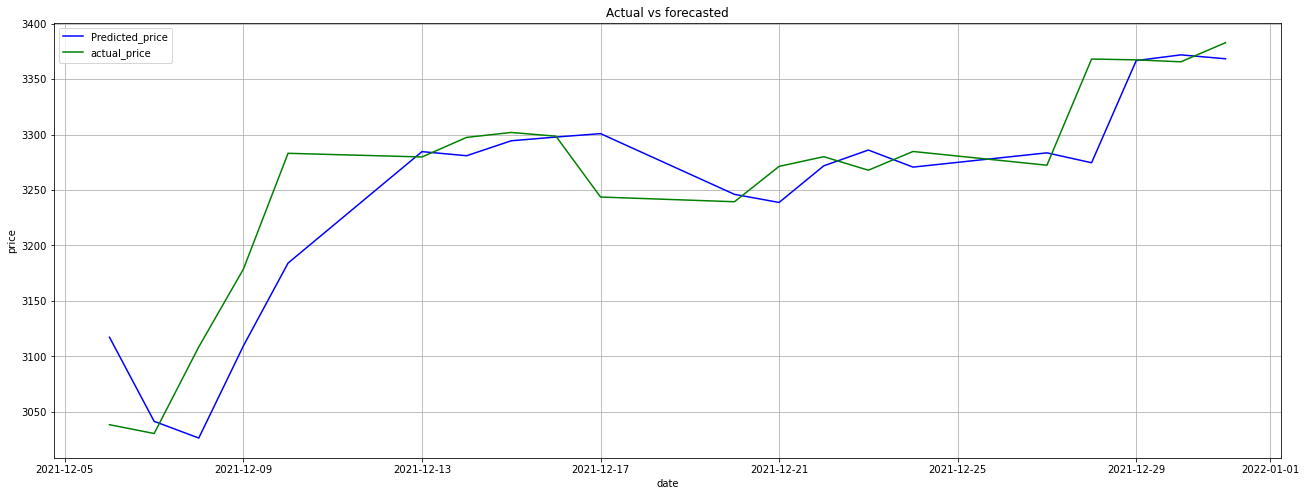

In [25]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[-20:],fore[:],color='blue',label='Predicted_price')
plt.plot(data_range[-20:],test[-20:],color='green',label='actual_price')

plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


Error calculation

In [26]:
date=pd.to_datetime(data_range)

In [27]:
len(test)

248

In [28]:
dif=[]
for i in range(20):
    dif.append(test[length-20+i]-fore[i])

In [29]:
print ("{:<25} {:<25} {:<25} {:<38}".format('Date','Actual','Predicted','difference'))
for i in range(20):
   # print(test[228+i],"        ",ans[i], "        =", dif[i])
    print ("{}    {:<25} {:<25}=  {:<25}".format(data_range[length-20+i],test[length-20+i],fore[i],dif[i]))

Date                      Actual                    Predicted                 difference                            
2021-12-06 00:00:00    3038.300048828125         3117.1938715102015       =  -78.89382268207646       
2021-12-07 00:00:00    3030.35009765625          3041.339576804525        =  -10.989479148275223      
2021-12-08 00:00:00    3108.5                    3026.2695405119134       =  82.23045948808658        
2021-12-09 00:00:00    3178.699951171875         3109.4395701128465       =  69.26038105902853        
2021-12-10 00:00:00    3283.14990234375          3184.110255660344        =  99.03964668340586        
2021-12-13 00:00:00    3279.85009765625          3284.6583631390954       =  -4.8082654828454         
2021-12-14 00:00:00    3297.5                    3280.963429477663        =  16.536570522337115       
2021-12-15 00:00:00    3301.949951171875         3294.4569360433898       =  7.49301512848524         
2021-12-16 00:00:00    3298.60009765625          3297.80658

In [30]:
from sklearn.metrics import mean_squared_error
mean_squa=mean_squared_error(test[length-20:length],fore[:20])
mean_squa

2108.4823527445024

In [31]:
import math
root_mean_squa=math.sqrt(mean_squa)
root_mean_squa

45.91821373643037